# 로지스틱 회귀

- 의의
    - 확률을 예측하는데 사용되는 통계 모델
        - 특정 결과의 확률을 계산
        
    - 결과값은 이진이어야 함(결과는 둘 중 하나)
        - 원하는 결과는 1, 원하지 않는 결과는 0
        
    - 선형회귀와 마찬가지로 다중 공선성은 거의 없어야 함
        - 독립변수는 서로 독립적이어야 함
    
    - 종속변수와 관련 없는 독립변수를 제거할 때 더 효율적인 경향이 있음
    
- 장점
    - 많은 양의 연산 자원을 필요로 하지 않음
    - 쉽게 해석할 수 있음
    
- 단점
    - 비선형 데이터에 사용하기 힘듦
    - 과대적합에 취약함
    - 1과 0으로만 결과가 출력되기 때문에 범주형 결과를 예측하는 데에만 사용가능

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.special import expit, softmax
plt.rcParams['axes.unicode_minus'] = False

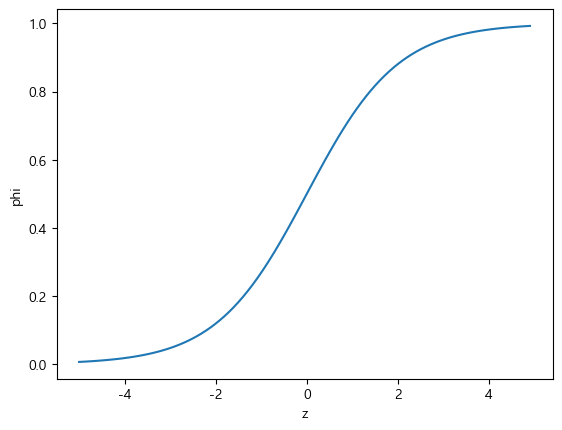

In [5]:
# 로지스틱 함수 시각화
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

## 데이터 준비

In [6]:
df = pd.read_csv("./data/Fish.csv")

In [7]:
df_bs = df[df["Species"].isin(["Bream", "Smelt"])]

In [8]:
df_bs.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [9]:
df_bs.tail(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [10]:
df_bs = df_bs.drop("Length1", axis = 1)

In [11]:
df_bs.head()

,Species,Weight,Length2,Length3,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [12]:
x = df_bs.drop("Species", axis = 1)
y = df_bs["Species"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 4)

In [14]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

## 모델 훈련

In [15]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

In [16]:
logi.predict(scaled_test)

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [17]:
# 예측확률 출력
logi.predict_proba(scaled_test)[:5]

array([[0.97148899, 0.02851101],
       [0.04079957, 0.95920043],
       [0.99616728, 0.00383272],
       [0.95984921, 0.04015079],
       [0.96947094, 0.03052906]])

In [18]:
# 종속변수 값 확인
logi.classes_

array(['Bream', 'Smelt'], dtype=object)

In [19]:
# 로지스틱 회귀 회귀식 확인
logi.coef_, logi.intercept_

(array([[-0.57696306, -0.77084508, -0.80633017, -0.85006795, -0.79827986]]),
 array([-2.70376518]))

- z = Weight * -0.57 + Length2 * -0.77 + Length3 * -0.8 + Height * -0.85 + Width * -0.79 + (-2.7)

# 회귀식을 통한 확률값 계산

In [20]:
# z값 계산
decision_z = logi.decision_function(scaled_test[:5])
decision_z

array([-3.5285396 ,  3.15742852, -5.56034138, -3.17413406, -3.45807148])

In [21]:
scaled_test[0]

array([-0.09071436,  0.22112041,  0.2702087 ,  0.35347067,  0.23589742])

In [22]:
-0.09 * -0.57 + 0.22 * -0.77 + 0.27 * -0.8 + 0.35 * -0.85 + 0.23 * -0.79 -2.7

-3.5133

In [23]:
# z값을 로지스틱 함수에 통과시켜 확률값 계산
expit(decision_z) # 1번 범주에 속할 확률

array([0.02851101, 0.95920043, 0.00383272, 0.04015079, 0.03052906])

In [24]:
1 - 0.02851101

0.97148899

In [26]:
# logistic 모델 정확도
logi.score(scaled_test, y_test)

1.0

In [29]:
y_test.map(lambda x: 0 if x == "Bream" else 1)

8      0
153    1
26     0
7      0
5      0
155    1
148    1
9      0
145    1
18     0
13     0
1      0
23     0
Name: Species, dtype: int64

In [30]:
fprs

array([0., 0., 0., 1.])

In [31]:
tprs

array([0.  , 0.25, 1.  , 1.  ])

In [32]:
thresholds

array([1.97322438, 0.97322438, 0.95352092, 0.00383272])

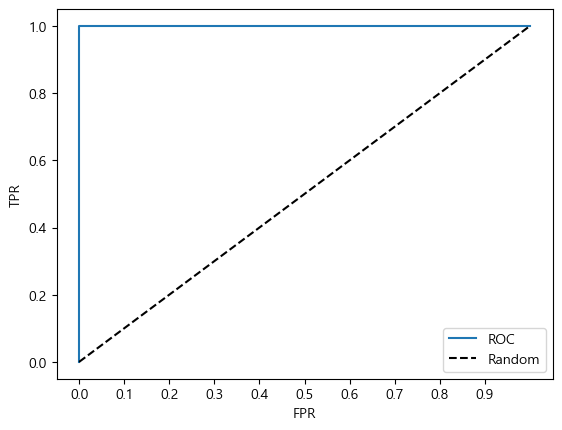

In [28]:
# roc 커브
pred_proba_class1 = logi.predict_proba(scaled_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test.map(lambda x: 0 if x == "Bream" else 1), pred_proba_class1)

plt.figure()
plt.plot(fprs, tprs, label = "ROC")
plt.plot([0,1], [0,1], "k--", label="Random")

plt.xticks(np.round(np.arange(0, 1, 0.1), 2))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

plt.show()

In [33]:
roc_auc_score(y_test, pred_proba_class1)

1.0

#### ROC 곡선(Receiver Operation Characteristic Curve)

<img src = "./image/roc.png">

- 수신자 판단 곡선
- 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 평가 지표
- FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate)의 변화를 나타낸 곡선
    - TPR
        - 재현율
        - TP / (TP + FN)
        - 실제 양성인 데이터 중 양성으로 예측된 비율
    - FPR
        - 1 - 특이도
        - FP / (FP + TN)
        - 실제 음성인 데이터 중 양성으로 잘못 예측된 비율
              
- ROC 곡선의 가운데 직선은 ROC 곡선의 최저값
    - 랜덤 수준의 이진 분류의 ROC 직선
    - ROC 곡선이 직선에서 멀어질수록 성능이 뛰어난 것
    
- 분류 결정 임계값을 변경하여 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함
    - 임계값을 1로 지정하면 FPR이 0이 됨
        - 100% 확실한 경우에만 양성으로 예측한다면 실제 음성인 데이터를 양성으로 잘못 예측할 확률은 0
        
    - 임계값을 0으로 지정하면 FPR은 1이 됨
        - 모든 데이터를 양성으로 예측한다면 실제 음성인 데이터를 양성으로 잘못 예측할 확률은 100%

## 로지스틱 회귀로 다중 분류

In [34]:
df = df[["Species", "Weight", "Length2", "Length3", "Height", "Width"]]

In [35]:
x = df.drop("Species", axis = 1)
y = df["Species"]

In [36]:
df.shape

(159, 6)

In [37]:
df["Species"].nunique()

7

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state = 4)

In [40]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [41]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.8067226890756303
0.825


In [42]:
logi.predict(scaled_test)

array(['Perch', 'Bream', 'Perch', 'Smelt', 'Perch', 'Smelt', 'Perch',
       'Parkki', 'Bream', 'Perch', 'Perch', 'Smelt', 'Bream', 'Perch',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Pike', 'Perch',
       'Parkki', 'Bream', 'Perch', 'Bream', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Perch', 'Perch', 'Pike', 'Perch', 'Perch',
       'Perch', 'Parkki', 'Perch', 'Pike', 'Perch'], dtype=object)

In [43]:
# 예측 확률값 확인
proba = logi.predict_proba(scaled_test[:5])
print(np.round(proba, decimals = 3))

[[0.009 0.064 0.602 0.021 0.258 0.018 0.028]
 [0.932 0.028 0.007 0.005 0.007 0.    0.021]
 [0.041 0.055 0.547 0.068 0.228 0.002 0.06 ]
 [0.    0.049 0.143 0.002 0.088 0.714 0.002]
 [0.007 0.129 0.439 0.013 0.31  0.082 0.019]]


In [44]:
# 종속변수 확인
logi.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [45]:
# 회귀식 확인
logi.coef_

array([[ 0.03466818, -0.14426458,  0.59447569,  2.87750097, -0.32660901],
       [-0.42664549, -0.68816025, -0.66056168,  1.84659393, -0.70298749],
       [ 1.051147  ,  0.23258994, -1.31369402, -1.873154  ,  1.96370622],
       [-0.08529506,  1.76189614,  1.71727333, -1.22798479, -0.72536922],
       [-0.87958312, -0.3986401 ,  0.31522013, -0.3711218 ,  0.58065257],
       [-0.3172497 , -0.77847619, -0.75299294, -1.2619235 , -1.66094845],
       [ 0.62295819,  0.01505504,  0.10027948,  0.01008918,  0.87155537]])

In [46]:
logi.intercept_

array([ 0.49493769, -0.0171718 ,  2.22732827,  0.02106828,  0.96085809,
       -4.10510449,  0.41808396])

- 현재의 로지스틱 다중분류에서 독립변수는 5개를 사용하기 때문에 coef_ 배열의 열은 5개임
- 종속변수의 범주 수가 7개이기 때문에 coef_ 배열의 행과 intercept_ 배열의 행은 7개임
    - 즉, 로지스틱 다중분류는 각 클래스마다 z값을 계산함
    - 이 때, 확률 값은 각각의 z값을 합이 1이 되도록 압축하기 위해 소프트맥스 함수(softmax)를 사용

### 회귀식을 통한 확률값 계산

In [47]:
decision_z = logi.decision_function(scaled_test[:5])

In [48]:
np.round(decision_z, decimals = 2)

array([[-1.75,  0.22,  2.46, -0.88,  1.62, -1.06, -0.61],
       [ 5.  ,  1.51,  0.08, -0.28,  0.14, -7.65,  1.2 ],
       [-0.37, -0.09,  2.21,  0.12,  1.34, -3.19, -0.01],
       [-4.13,  0.99,  2.06, -2.09,  1.58,  3.67, -2.08],
       [-2.12,  0.77,  2.  , -1.5 ,  1.65,  0.32, -1.12]])

In [53]:
proba = softmax(decision_z, axis = 1) # axis = 1: 각 행에 대해서 소프트맥스 계산
np.round(proba, decimals=3)

array([[0.009, 0.064, 0.602, 0.021, 0.258, 0.018, 0.028],
       [0.932, 0.028, 0.007, 0.005, 0.007, 0.   , 0.021],
       [0.041, 0.055, 0.547, 0.068, 0.228, 0.002, 0.06 ],
       [0.   , 0.049, 0.143, 0.002, 0.088, 0.714, 0.002],
       [0.007, 0.129, 0.439, 0.013, 0.31 , 0.082, 0.019]])

In [54]:
0.009 + 0.064 + 0.602 + 0.021 + 0.258 + 0.018 + 0.028

1.0

# 정리

- 로지스틱 회귀는 선형 회귀처럼 선형 방정식을 사용
- 방정식의 값을 0 ~ 1 사이로 압축
    - 해당 값을 0 ~ 100% 사이의 확률로 이해할 수 있음
- 이진 분류
    1. 하나의 선형 방정식을 훈련
    2. 출력값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값을 만듦
    3. 2번의 출력값이 양성 클래스에 대한 확률
- 다중 분류
    1. 클래스 개수만큼 방정식을 훈련
    2. 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 계산
    3. 2번의 출력값이 각 클래스에 대한 확률값